# Assignment: Exploratory Data Analysis
## Do two. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 34 (delta 4), reused 2 (delta 2), pack-reused 24
Receiving objects: 100% (34/34), 7.18 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.1
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')

In [ ]:
# 1.2
df.shape
# (3798, 63): The data has 3798 observations and 63 variables

(3798, 63)

In [ ]:
df.head()
# Some of the variables include name, location, type of university, degrees, public/private, transfer rate, cohort size.

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
# 1.3
pd.crosstab(df['control'], df['level'])
# The crosstabulation shows that about 2/3 of 2-year colleges are public, with very few private not-for-profit.
# About half of 4-year colleges are prive not-for-profit. 4-year colleges also comprise about 2/3 of the data.
# Private for-profit and public colleges split between levels relatively evenly; over 90% of private not-for-profit colleges are 4-year.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: xlabel='grad_100_value', ylabel='Count'>

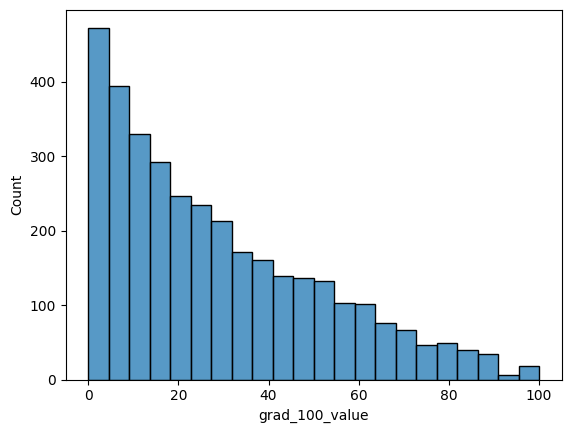

In [ ]:
# 1.4
sns.histplot(data=df, x='grad_100_value')

<Axes: xlabel='grad_100_value', ylabel='Density'>

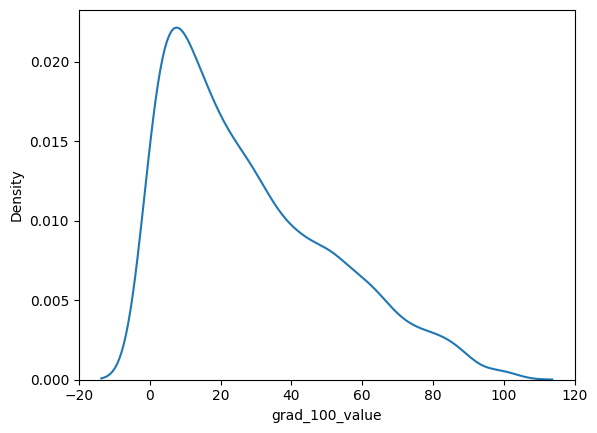

In [ ]:
sns.kdeplot(data=df, x='grad_100_value')

<Axes: xlabel='grad_100_value'>

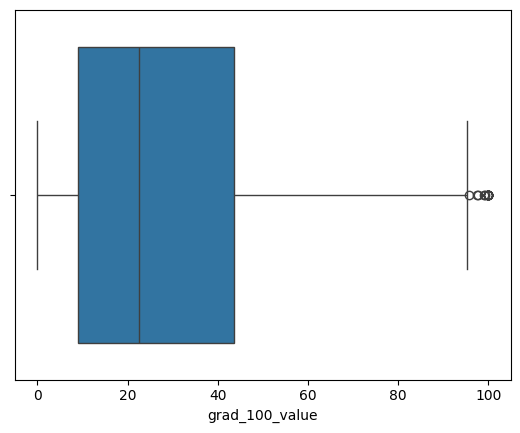

In [ ]:
sns.boxplot(data=df, x='grad_100_value')

In [ ]:
df.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


<Axes: xlabel='grad_100_value', ylabel='Density'>

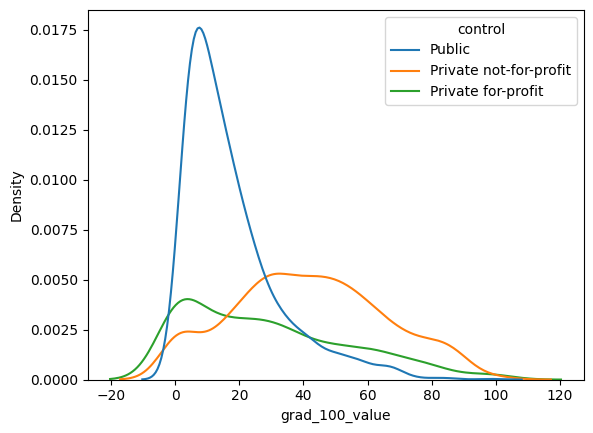

In [ ]:
# 1.5
var1 = 'grad_100_value'
cat1 = 'control'
cat2 = 'level'
sns.kdeplot(data=df, x=var1, hue=cat1)
# The plot shows many public schools fall around the 10-20 range for grad value, but is sparse in other regions.
# Private for-profit schools are underwhelming overall, and private not-for-profit schools show a density increase in the middle to upper range of value.

<Axes: xlabel='grad_100_value', ylabel='Density'>

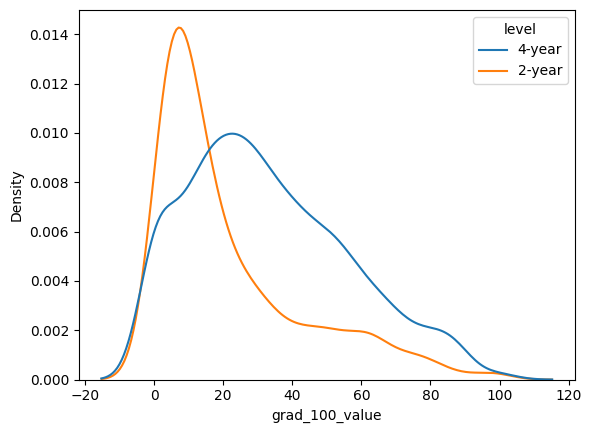

In [ ]:
sns.kdeplot(data=df, x=var1, hue=cat2)
# 4-year schools show a much broader curve, with an overall higher value than 2-year schools.

In [ ]:
df.loc[:,[var1,cat1]].groupby(cat1).describe()
# Private not-for-profit schools have the highest mean, standard deviations, and IQR values; they have the best value.

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [ ]:
df.loc[:,[var1,cat2]].groupby(cat2).describe()
# 4-year schools have the best value, same reasoning.

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

<Axes: xlabel='grad_100_value', ylabel='Density'>

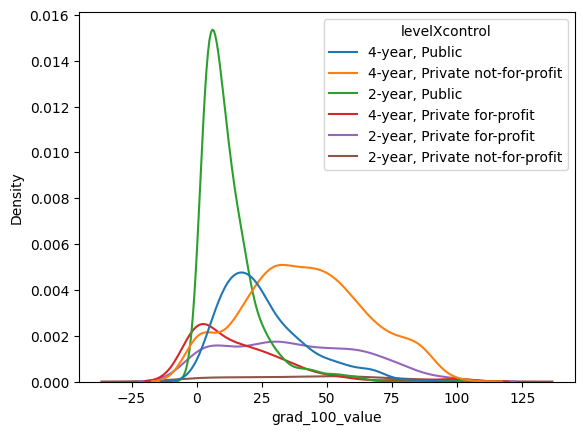

In [ ]:
# 1.6
df['levelXcontrol']=df['level']+', '+df['control']
group = 'levelXcontrol'
sns.kdeplot(data=df, x=var1, hue=group)
# It appears 4-year, private not-for-profit schools have the highest graduation rates.
# Note that 2-year, public schools have a relatively hihgh density but a lower average value.

<Axes: xlabel='aid_value', ylabel='Density'>

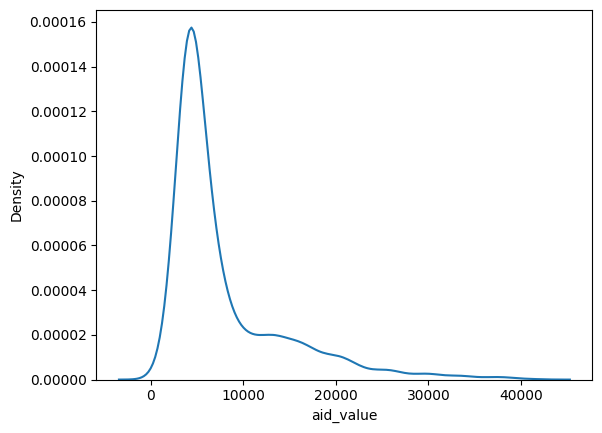

In [ ]:
# 1.7
var2 = 'aid_value'
sns.kdeplot(data=df, x=var2)

<Axes: xlabel='aid_value', ylabel='Density'>

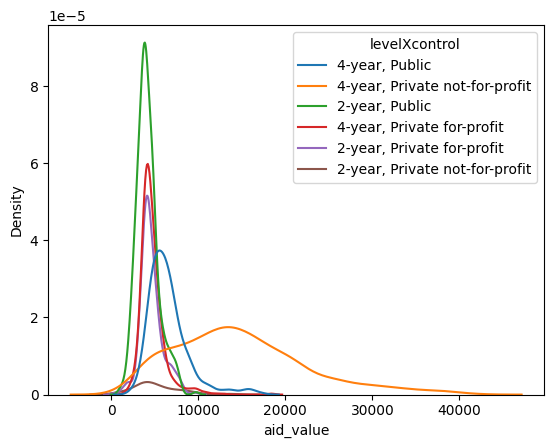

In [ ]:
sns.kdeplot(data=df, x=var2, hue=group)
# The shape of the graph shows a higher density aid value around 5000; perhaps this is skewed by a number of students who do not utilize aid.

In [ ]:
df.loc[:,[group,var2]].groupby(group).describe()

aid_value                                     \
                                   count          mean          std     min   
levelXcontrol                                                                 
2-year, Private for-profit         464.0   4559.681034  1286.688269   294.0   
2-year, Private not-for-profit      68.0   5128.058824  2590.449946   934.0   
2-year, Public                     926.0   4126.199784  1260.271382   881.0   
4-year, Private for-profit         527.0   4696.062619  1489.410020  1580.0   
4-year, Private not-for-profit    1180.0  14702.401695  7649.775203   902.0   
4-year, Public                     632.0   6514.071203  2353.716693  2232.0   

                                                                     
                                    25%      50%       75%      max  
levelXcontrol                                                        
2-year, Private for-profit      3818.75   4286.5   5122.00   9727.0  
2-year, Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
2-year, Public                  3311.25   3943.5   4762.00   9809.0  
4-year, Private for-profit      3885.50   4364.0   5131.50  18355.0  
4-year, Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
4-year, Public                  4990.50   6085.0   7341.50  17299.0

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

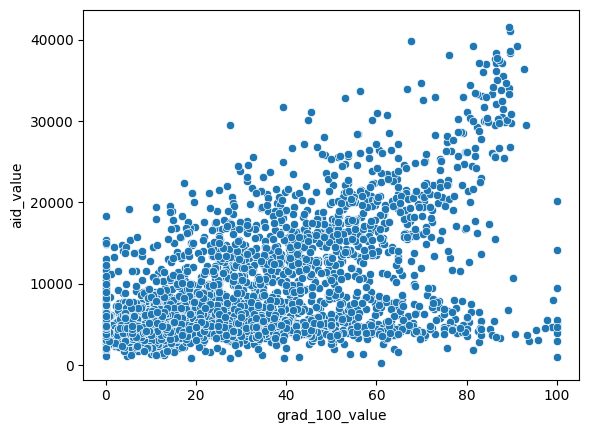

In [ ]:
# 1.8
# Make a scatterplot of grad_100_value by aid_value.
sns.scatterplot(data=df, x=var1, y=var2)
# The plot shows an positive correlation between grad and aid value.
# Some of the values with high grad have low aid value, but there are no cases with high aid but low grad value.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

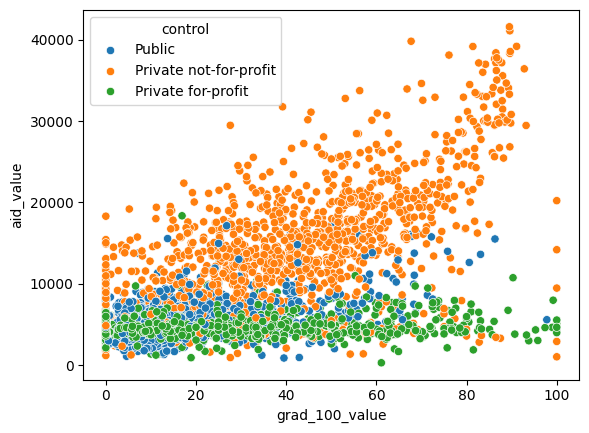

In [ ]:
sns.scatterplot(data=df, x=var1, y=var2, hue=cat1)
# Private not-for-profit schools show the most grad increase with aid value.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

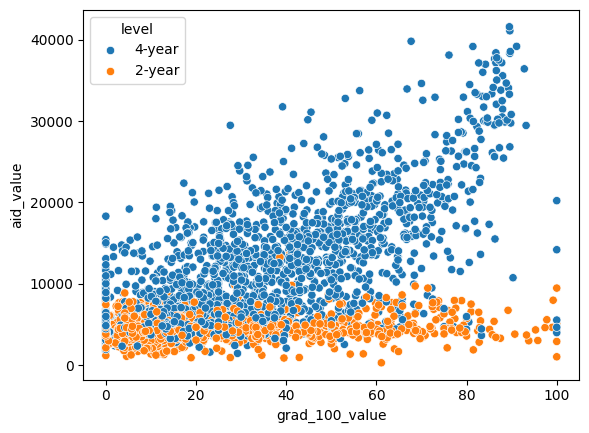

In [ ]:
sns.scatterplot(data=df, x=var1, y=var2, hue=cat2)
# 4-year schools show the most grad increase with aid value increase.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [8]:
# Q2.1
df = pd.read_csv('/content/visualization/assignment/data/airbnb_hw.csv')
var1 = 'Price'
df[var1] = df[var1].str.replace(',', '')
df[var1] = pd.to_numeric(df[var1], errors='coerce')

In [9]:
# Q2.2
df.shape
# (30478, 13): 30478 observations and 13 variables.

(30478, 13)

In [10]:
df.head()
# Variables include host info, name, area, room, reviews, price.

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [11]:
# Q2.3
pd.crosstab(df['Room Type'], df['Property Type'])
# Apartment rentals are the majority of available rentals for all room types. B&B, House, and Loft are other types with significant counts.
# Private rooms are more common than the property for B&B and House.

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: xlabel='Price', ylabel='Count'>

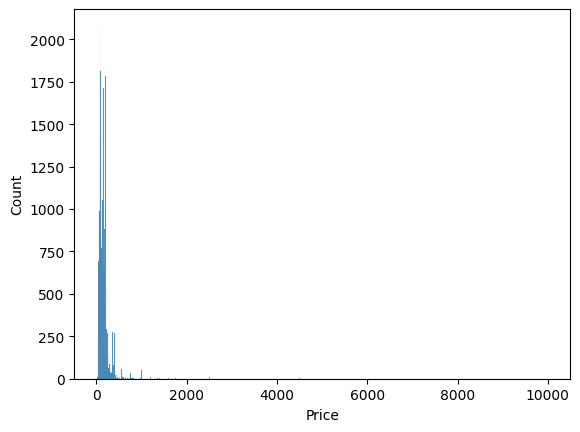

In [12]:
# Q2.4
sns.histplot(data=df, x=var1)

<Axes: xlabel='Price', ylabel='Density'>

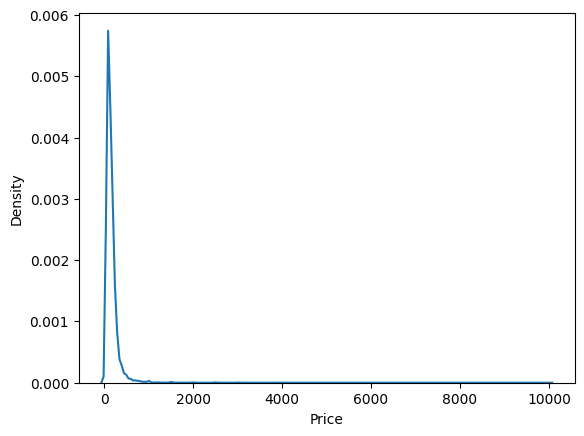

In [13]:
sns.kdeplot(data=df, x=var1)

<Axes: xlabel='Price'>

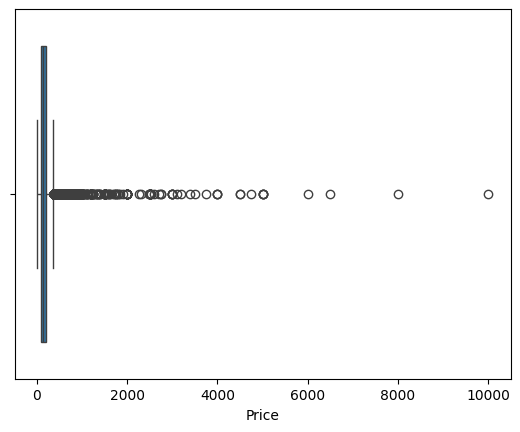

In [14]:
sns.boxplot(data=df, x=var1)

In [17]:
df[var1].describe()
# The data are badly scaled. The plots show that there are relatively few outliers compared to the rest of the data.
# The summary statistics also show the maximum for price is 10000, much higher than the Q3 value of 195.

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: xlabel='price_log', ylabel='Count'>

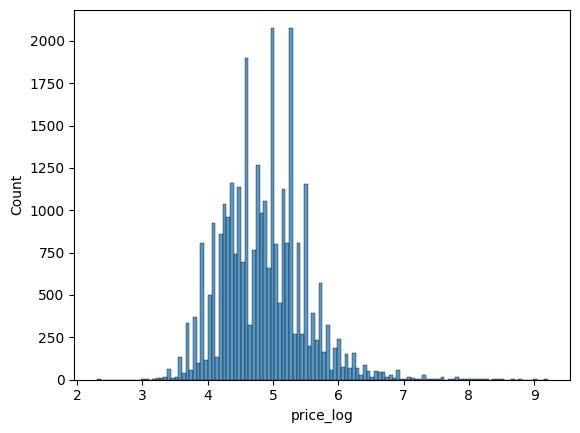

In [18]:
# Use log to transform price into a new variable, price_log, and take these steps again
var2 = 'price_log'
df[var2] = np.log(df[var1])
sns.histplot(data=df, x=var2)

<Axes: xlabel='price_log', ylabel='Density'>

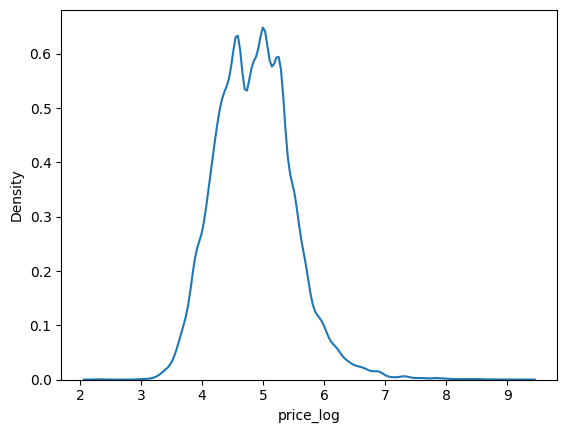

In [19]:
sns.kdeplot(data=df, x=var2)

<Axes: xlabel='price_log'>

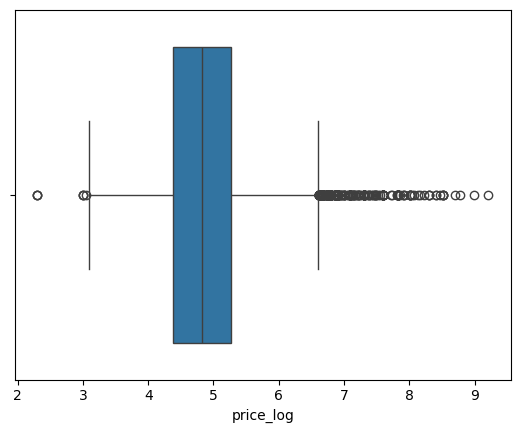

In [20]:
sns.boxplot(data=df, x=var2)

In [21]:
df[var2].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

In [ ]:
# Q2.5
# Make a scatterplot of price_log and Beds. Describe what you see.
# Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds.
# Describe any patterns you see in the average price and standard deviation in prices.

In [ ]:
# Q2.6
# Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see?
# Compute a description of Price conditional on Room Type and Property Type.
# Which Room Type and Property Type have the highest prices on average?
# Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [ ]:
# Q2.7
# We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex.
# Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.